# <center>BATTLE OF NEIGHBOURHOODS - CHENNAI</center>


### Table of Contents

* [Introduction_Problem_Statement](#Introduction_Problem_Statement)

* [Data_Procurement](#Data_Procurement)

* [Data_Wrangling](#Data_Wrangling)

* [Data_Analysis](#Data_Analysis)

* [Results_&_Discussion](#Results_&_Discussion)

* [Conclusion](#Conclusion)




## Introduction Problem Statement <a class="anchor" id="Introduction_Problem_Statement"></a>


Chennai is one of the biggest cities in India with a population of close to 10 million people. The city is known for its rich and varied culture and different cuisines. The most common cuisines of Chennai include - South Indian, North Indian, Asian, Seafood, Middle eastern, Thai, Italian, Continental, etc...

Chennai is one of the most visited place in India and is a favourite among tourists as the city offers just about everything to the incomer. The main purpose of this Notebook Assignment is to help a new visitor to the city with eating options which is not too pricey as well as with good quality. We will look upon a range of restaurants and suggest the best to the visitor through this project.

#### Lets Start !!!

## Data Procurement <a class="anchor" id="Data_Procurement"></a>

The Data that is needed for this project is obtained via Four Square APIs and Zomata APIs. Ok, You might be wondering what is Four Square and Zomato. Let me explain 

#### FOUR SQUARE 

Foursquare is a popular social location service that allows users to explore the world around them. Users can access the application on to their mobile phones and when ever they visit a place and then "check in", this sends a notification to their friends who are also connected with the person using the app. This way the users get to access lot of unknown places which in turn helps people to visit the place

#### ZOMATO

Zomato is one of the largest food delivery and restaurant aggregator which helps users to identify restaurants of their choice given the choice of food they would want to eat at a given particular time of the day. It has grown leaps and bounds since it started in the year 2008 and has its service across India on all major cities.

##### Four Square APIs - 
we will be capturing a list of places from the Chennai Lat and Chennai long within the circle of radius 5 kms.

##### Zomato APIs - 
We will be capturing a list of restaurants from the Chennai Lat and Chennai long within the circle of radius 5 kms with complete address, price and ratings. 

Once we are done with collecting the data, we will merge the data and remove redundancies and use that as the pandas dataframe for further analysis. 

#### 1) importing necessary librararies

In [2]:
import pandas as pd
import numpy as np

In [3]:
from geopy.geocoders import Nominatim

#### 2) getting the chennai latitude and longitude using geolocator object

In [4]:
address = 'Chennai'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chennai are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chennai are 13.0836939, 80.270186.


#### 3) viewing the map via folium

What is Folium: Folium is an inbuilt library that can be called upon to visualize the manipulated data on a leaflet map. Folium's map function requires location details (lat, long) and the zoom level.  

In [5]:
import folium

In [6]:
chennai_map = folium.Map(location = [latitude, longitude], zoom_start = 13)
folium.Marker([latitude, longitude]).add_to(chennai_map)
chennai_map

#### 4) FourSquare API Data:

Foursquare needs certain details like Client Id, Client Secret ID, radius with in which you need the venue details, number of venues and the version as parameters. 

Among these, 
* Client ID and Client Secret ID can be generated by creating a Foursquare account. 
* number of venues is an integer number which is typically greater than 0.
* version is nothing but todays date in YYYYMMDD format. 

In [7]:
# Client Id
# Z4YYMMFU4R5ATYFWLTFCTAZOA5JSATDBYUVAMUKZHUQRUMKX

# Client Secret
# Y4GXGW2V0L1SQB1TL4TBAYZNKTNNS3OCEUSI2ZVX11GI4NB1

foursquare_clientid = 'Z4YYMMFU4R5ATYFWLTFCTAZOA5JSATDBYUVAMUKZHUQRUMKX'
foursquare_clientsecret = 'Y4GXGW2V0L1SQB1TL4TBAYZNKTNNS3OCEUSI2ZVX11GI4NB1'
radius = 5000 # 4 Km
no_of_venues = 100
version = '20210112' # Current date

#### 5) Get Category Type for the venues obtained through the function

In [8]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### 6) Fire the Foursquare API and get the venues around 5 km from the chennai lat and long

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas import json_normalize
import requests

In [10]:
pd.set_option('display.max_rows', None)

offset = 0
total_venues = 0
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(foursquare_clientid, 
                                                                        foursquare_clientsecret, 
                                                                        version, 
                                                                        latitude, 
                                                                        longitude, 
                                                                        radius,
                                                                        no_of_venues,
                                                                        offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    print("Total {} venues fetched within a total radius of {} Km".format(venues_fetched, radius/1000))

    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)

    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]

    # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)

    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    foursquare_venues = pd.concat([foursquare_venues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100

foursquare_venues = foursquare_venues.reset_index(drop = True)
print("\nTotal {} venues fetched".format(total_venues))

Total 90 venues fetched within a total radius of 5.0 Km

Total 90 venues fetched


In [11]:
foursquare_venues.tail()

,name,categories,lat,lng
85,Abirami Mega Mall,Multiplex,13.085900,80.248159
86,Atthho shop- Parry's Corner,Snack Place,13.090680,80.290424
87,Bombay Halwa House,Indian Restaurant,13.085313,80.245111
88,Royapuram Railway Station,Train Station,13.103658,80.288981
89,Big Bazaar,Department Store,13.109587,80.284394


In [12]:
foursquare_venues_categories = foursquare_venues.groupby('categories')

In [13]:
print(foursquare_venues_categories)

#### 7) Viewing the obtained venue details after grouping by Categories

In [14]:
foursquare_venues_categories.first() 

,name,lat,lng
categories,,,
African Restaurant,Nando's,13.046237,80.256267
Asian Restaurant,Nasi And Mee,13.060796,80.249833
Athletics & Sports,The Presidency Club,13.065540,80.258434
Bar,Blend - The High Energy Bar,13.061581,80.264448
Beach,Marina Beach | மெரினா கடற்கரை (Marina Beach),13.047663,80.280698
Bookstore,Higginbothams,13.083190,80.275168
Café,Nicky's Cafe & Fine Pastries,13.063923,80.259764
Chinese Restaurant,Dynasty,13.066880,80.243102
Chocolate Shop,Sandy's Chocolate Laboratory,13.061070,80.248368


#### 8) Zomato API: 
Zomato's API key could be got from the official website of Zomato. We use this key to fire the API and get the restaurants in the vicinity of the Chennai lat and long (5 km radius from the particular point)  

In [15]:
headers = {'user-key': '3db9934831a919e951d30d64c077d9f5'}
venues_information = []

for index, row in foursquare_venues.iterrows():
    print("Fetching data for venue: {}".format(index + 1))
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['name'], row['lat'], row['lng'])
    result = requests.get(url, headers = headers).json()
    if (len(result['restaurants']) > 0):
        venue.append(result['restaurants'][0]['restaurant']['name'])
        venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][0]['restaurant']['price_range'])
        venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
        venue.append(result['restaurants'][0]['restaurant']['location']['address'])
        venues_information.append(venue)
    else:
        venues_information.append(np.zeros(6))
    
zomato_venues = pd.DataFrame(venues_information, 
                                  columns = ['venue', 'latitude', 
                                             'longitude', 'price_for_two', 
                                             'price_range', 'rating', 'address'])

Fetching data for venue: 1
Fetching data for venue: 2
Fetching data for venue: 3
Fetching data for venue: 4
Fetching data for venue: 5
Fetching data for venue: 6
Fetching data for venue: 7
Fetching data for venue: 8
Fetching data for venue: 9
Fetching data for venue: 10
Fetching data for venue: 11
Fetching data for venue: 12
Fetching data for venue: 13
Fetching data for venue: 14
Fetching data for venue: 15
Fetching data for venue: 16
Fetching data for venue: 17
Fetching data for venue: 18
Fetching data for venue: 19
Fetching data for venue: 20
Fetching data for venue: 21
Fetching data for venue: 22
Fetching data for venue: 23
Fetching data for venue: 24
Fetching data for venue: 25
Fetching data for venue: 26
Fetching data for venue: 27
Fetching data for venue: 28
Fetching data for venue: 29
Fetching data for venue: 30
Fetching data for venue: 31
Fetching data for venue: 32
Fetching data for venue: 33
Fetching data for venue: 34
Fetching data for venue: 35
Fetching data for venue: 36
F

#### 9) Viewing the data which is being converted to pandas dataframe that was obtained from Zomato API

In [16]:
zomato_venues.tail()

,venue,latitude,longitude,price_for_two,price_range,rating,address
85,Kovai Pazhamudir Nilayam,13.0854976910,80.2485880628,200.0,1.0,3.9,"80/93, Palace Regency, Opposite Abirami Theatr..."
86,Cool Biz,13.0904504036,80.2900315449,600.0,2.0,4.0,"1, Erabalu Chetty Street, George Town, Chennai"
87,Bombay Halwa House,13.0852001855,80.2448269352,500.0,2.0,4.3,"12 & 14, 1st Floor, Balfour Road, Windsor Pala..."
88,The Table,13.1025917372,80.2905250713,300.0,1.0,3.9,"Thambu Chetty Street, Off Royapuram Flyover, G..."
89,Nizam Biriyani Restaurant,13.1084300000,80.2940400000,400.0,1.0,0,"13, Bazaar Street, Royapuram, Chennai"


## Data Wrangling <a class="anchor" id="Data_Wrangling"></a>

### Data has to be properly aligned, cleaned and processed for us to have a better understanding of what the data says and to derive meaningful conclusions by analysing it.

#### 1) We will plot The foursquare venues and view the locations

In [17]:
chennai_map = folium.Map(location = [latitude, longitude], zoom_start = 13)

for name, latitude, longitude in zip(foursquare_venues['name'], foursquare_venues['lat'], foursquare_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(chennai_map)  


chennai_map

#### Observations: 
Few regions are distinctly visible from the map that they have plenty of restaurants to dine. 
Evidently, they are 
- Khader Nawaz Road
- Locations around Poonamalle high road
- Express Avenue Mall


#### 2) We will plot The zomato venues and view the locations

In [18]:
chennai_map = folium.Map(location = [latitude, longitude], zoom_start = 13)

for venue, address, latitude, longitude in zip(zomato_venues['venue'], zomato_venues['address'], 
                                               zomato_venues['latitude'], zomato_venues['longitude']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#cc3535',
        fill_opacity = 0.7,
        parse_html = False).add_to(chennai_map)  


chennai_map

#### Observations: 
Few regions are distinctly visible from the map that have many restaurants. They are: 
 
- Khader Nawaz Road
- Locations around Poonamalle high road
- Express Avenue Mall
- Ethiraj Salai

### Note from the above two maps: 

The locations from both the APIs are effectively one and the same with Zomato giving little more precisely. 

#### 3) We will clean up the data little bit, we will combine the datasets (Four Square and Zomato). We will also make sure that the locations obtained from the APIs are same by calculating the diff in the latitudes of both the APIs

In [19]:
foursquare_venues['lat'] = foursquare_venues['lat'].apply(lambda lat: round(float(lat), 4))
foursquare_venues['lng'] = foursquare_venues['lng'].apply(lambda lng: round(float(lng), 4))
zomato_venues['latitude'] = zomato_venues['latitude'].apply(lambda lat: round(float(lat), 4))
zomato_venues['longitude'] = zomato_venues['longitude'].apply(lambda lng: round(float(lng), 4))

#### 4) The concatenated Dataset is below

In [20]:
dataset = pd.concat([foursquare_venues, zomato_venues], axis = 1)
dataset['lat_diff'] = dataset['latitude'] - dataset['lat']
dataset['lng_diff'] = dataset['longitude'] - dataset['lng']

In [21]:
selected_venues = dataset[(abs(dataset['lat_diff']) <= 0.0004) & (abs(dataset['lng_diff']) <= 0.0004)].reset_index(drop = True)
selected_venues

,name,categories,lat,lng,venue,latitude,longitude,price_for_two,price_range,rating,address,lat_diff,lng_diff
0,Links,Snack Place,13.0800,80.2546,Links,13.0799,80.2545,300.0,1.0,4.1,"22, Raja Annamalai Road, Purasavakkam, Chennai",-0.0001,-0.0001
1,Shree Mithai,Indian Restaurant,13.0721,80.2479,Shree Mithai,13.0718,80.2480,350.0,1.0,4.5,"18, Dr TV Road, Chetpet, Chennai",-0.0003,0.0001
2,Bombay Lassi,Dessert Shop,13.0660,80.2712,Bombay Lassi,13.0659,80.2712,100.0,1.0,4.3,"8, Bahar Agan Street, Anna Salai, Ellis Road, ...",-0.0001,0.0000
3,Fruit Shop On Greams Road,Juice Bar,13.0604,80.2544,The Cake World,13.0604,80.2545,250.0,1.0,3.5,"11/2, Greams Road, Near Police Station, Thousa...",0.0000,0.0001
4,Express Avenue,Shopping Mall,13.0587,80.2642,Cafe Coffee Day,13.0586,80.2642,600.0,2.0,2.4,"49/15, 3rd Floor, Express Avenue Mall, Whites ...",-0.0001,0.0000
5,Sandwich Shop,Sandwich Place,13.0690,80.2573,Balaji Sandwich,13.0687,80.2572,150.0,1.0,0,"149 /4, Monteith Road, Egmore, Chennai",-0.0003,-0.0001
6,Sathyam Cinemas,Movie Theater,13.0555,80.2580,Sathyam Cinemas,13.0554,80.2580,300.0,1.0,4.3,"8, Thiruvika Road, Royapettah, Chennai",-0.0001,0.0000
7,Nair Mess,Indian Restaurant,13.0645,80.2776,Nair Mess,13.0644,80.2776,200.0,1.0,4.5,"22, Mohammed Abdullah, 2nd Street, Opposite Ch...",-0.0001,0.0000
8,Blend - The High Energy Bar,Bar,13.0616,80.2644,Spider Bar- La Woods Hotel,13.0620,80.2642,2100.0,4.0,3.8,"1, 3rd Floor, La Woods Hotel, Woods Road, Moun...",0.0004,-0.0002
9,Alliance Francaise,Theater,13.0668,80.2457,Cream Centre,13.0671,80.2461,1600.0,3.0,4.2,"45, College Road, Near Madras Alliance Francai...",0.0003,0.0004


#### 5) We will clean up more here. Get the Average price and Drop certain redundant columns to make the data frame look clean

In [22]:
selected_venues['average_price'] = selected_venues['price_for_two']/2

In [23]:
selected_venues = selected_venues.drop(columns = ['name', 'lat', 'lng', 'lat_diff', 'lng_diff', 'price_for_two'])

In [24]:
selected_venues.head(5)

,categories,venue,latitude,longitude,price_range,rating,address,average_price
0,Snack Place,Links,13.0799,80.2545,1.0,4.1,"22, Raja Annamalai Road, Purasavakkam, Chennai",150.0
1,Indian Restaurant,Shree Mithai,13.0718,80.2480,1.0,4.5,"18, Dr TV Road, Chetpet, Chennai",175.0
2,Dessert Shop,Bombay Lassi,13.0659,80.2712,1.0,4.3,"8, Bahar Agan Street, Anna Salai, Ellis Road, ...",50.0
3,Juice Bar,The Cake World,13.0604,80.2545,1.0,3.5,"11/2, Greams Road, Near Police Station, Thousa...",125.0
4,Shopping Mall,Cafe Coffee Day,13.0586,80.2642,2.0,2.4,"49/15, 3rd Floor, Express Avenue Mall, Whites ...",300.0


#### 6) Finally we end up with 46 locations which are the most appropriate

In [25]:
selected_venues.count()

categories       48
venue            48
latitude         48
longitude        48
price_range      48
rating           48
address          48
average_price    48
dtype: int64

In [26]:
selected_venues = selected_venues[selected_venues['rating'] != 0.0]
print("Total venues available: {}".format(selected_venues.shape[0]))

Total venues available: 47


## Data Analysis <a class="anchor" id="Data_Analysis"></a>

#### 1) We will plot a graph to see which category of restaurant is the most famous among the public

<BarContainer object of 27 artists>

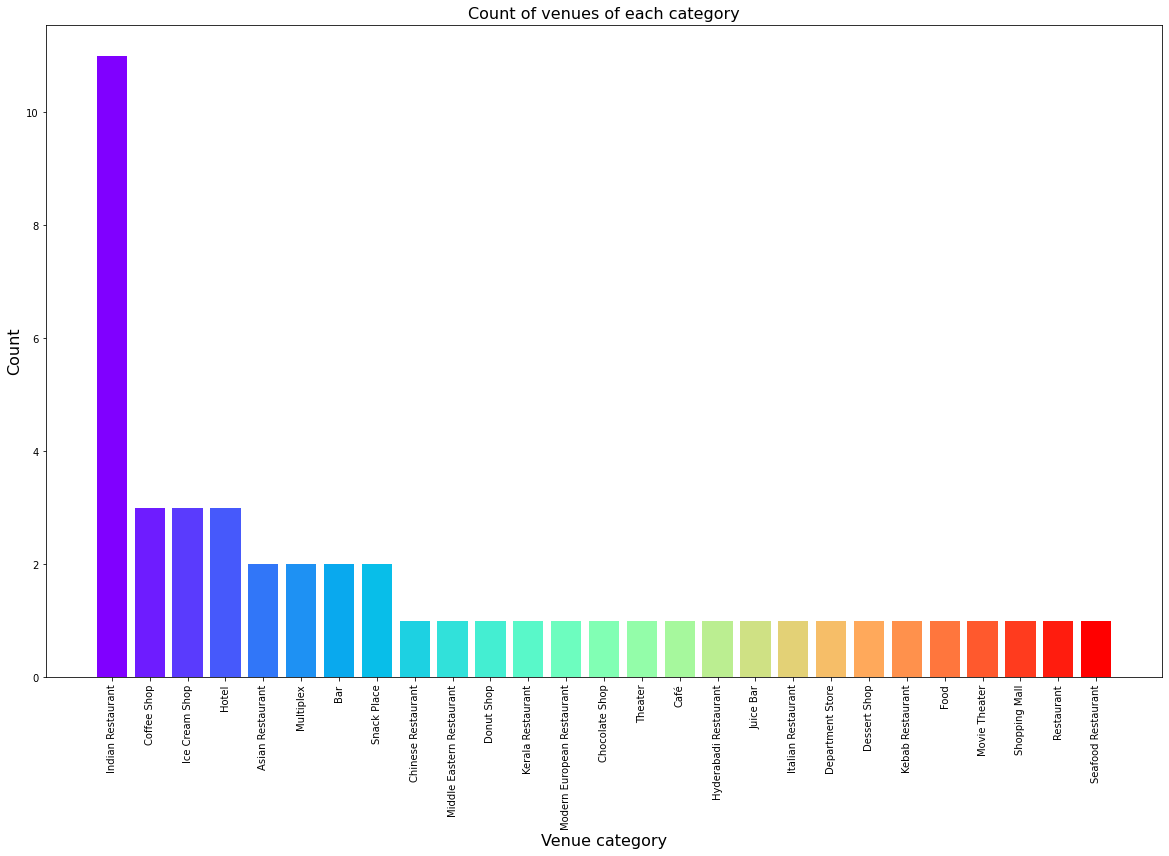

In [27]:
venue_distribution = selected_venues['categories'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

#### Observations from the above line space graph: 
- The Indian Restaurant is the most famous type of restaurant in Chennai locality and the Gourmet shop is the least famous among all
- There are few more types of restaurants that strangely makes up to the list are Japanese and Korean ones

#### 2) We will plot a bar graph to check what is the most common rating for the restaurants

Text(0.5, 1.0, 'Count of venues with given rating')

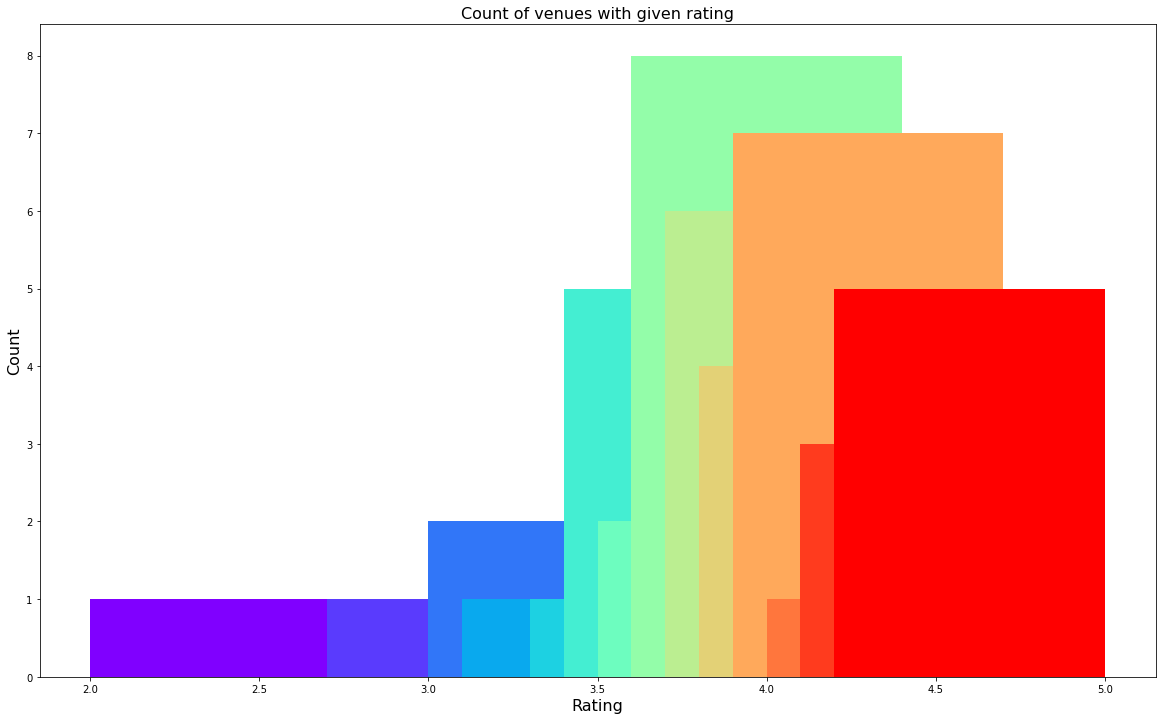

In [28]:
selected_venues['rating'] = selected_venues['rating'].astype(float)
rating = selected_venues['rating'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.bar(rating.index, rating.values, color = cm.rainbow(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues with given rating", fontsize = 16)

#### Observations from the above bar graph: 
- The rating for most of the restaurants as rated by the people in Zomato hovers around 3.5 to 4

#### 3) We will make a segregation of restaurants something like this.

- 1 - 2 = Low
- 2 - 3 = Okay
- 3 - 4 = Good
- 4 - 5 = Very Good

In [29]:
bins = [1.0, 2.0, 3.0, 4.0, 5.0]
labels = ['Low', 'Okay', 'Good', 'Very good']
selected_venues['rating_bin'] = pd.cut(selected_venues['rating'].astype(float), bins = bins, labels = labels, include_lowest = True)

#### 4) We will plot the locations in the leaflet map with rating as the main parameter

In [30]:
color_map = {'Low': 'red', 'Okay': 'orange', 'Good': 'green', 'Very good': 'darkgreen'}

chennai_map = folium.Map(location = [latitude, longitude], zoom_start = 13)

for name, address, latitude, longitude, rating_bin in zip(selected_venues['venue'], 
                                                          selected_venues['address'], 
                                                          selected_venues['latitude'], 
                                                          selected_venues['longitude'], 
                                                          selected_venues['rating_bin']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating_bin]),
        popup = label).add_to(chennai_map)  


chennai_map

#### 5) We will plot the locations in the leaflet map with price as the main parameter


In [31]:
color_map = {'1.0': 'green', '2.0': 'darkgreen', '3.0': 'orange', '4.0': 'red'}

chennai_map = folium.Map(location = [latitude, longitude], zoom_start = 13)

for name, address, latitude, longitude, price_range in zip(selected_venues['venue'], 
                                                           selected_venues['address'], 
                                                           selected_venues['latitude'], 
                                                           selected_venues['longitude'], 
                                                           selected_venues['price_range'].astype(str)):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[price_range]),
        popup = label).add_to(chennai_map)  


chennai_map

#### 6) We will calculate the average price and see as to how many restaurants will come under a particular range
- 0   - 200
- 200 - 400
- 400 - 600
- 600 - 800
- 800 - 1000
- 1000- 1200
- 1200- 1400
- greater than 1400

Text(0.5, 1.0, 'Count of venues with given average price')

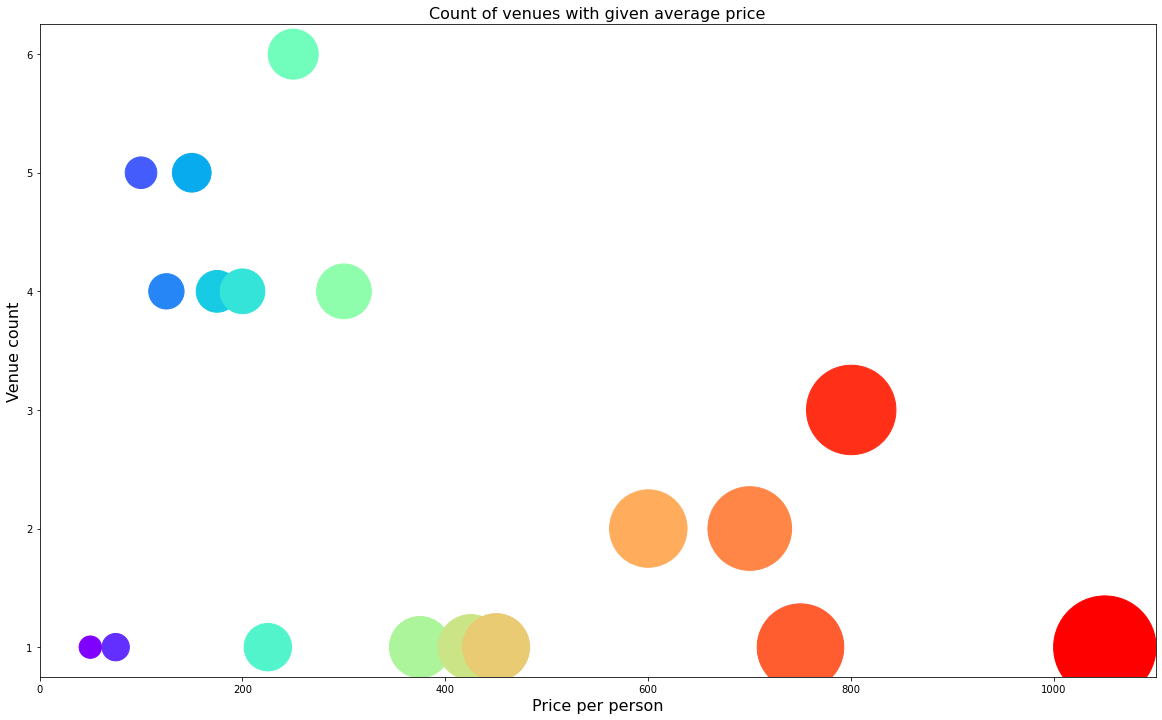

In [32]:
average_prices = selected_venues['average_price'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.scatter(average_prices.index, 
            average_prices.values, 
            s = average_prices.index*10, 
            c = cm.rainbow(np.linspace(0, 1, len(average_prices.index))))
plt.xlabel("Price per person", fontsize = 16)
plt.ylabel("Venue count", fontsize = 16)
plt.title("Count of venues with given average price", fontsize = 16)

#### Observation: Most of the restaurants fall under the range of 200 - 600 on average for two people to dine

### 7) We will try to cluster the restaurants based on ratings
- We will have to take into consideration on choosing the K (number of cluster). 
- To aid this purpose, we will plot the elbow graph to pick the best K.
- We will then use that K value and create clusters

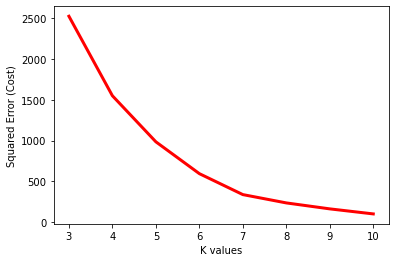

In [33]:
from sklearn.cluster import KMeans

chennai_clustering = selected_venues.drop(['venue', 'address', 'rating_bin', 'categories'], 1)


error_cost = []

for i in range(3,11):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(chennai_clustering)
    except ValueError:
        print("error on line",i)
    
    
    
    
    #calculate squared error for the clustered points
    error_cost.append(KM.inertia_/100)

#plot the K values aganist the squared error cost
plt.plot(range(3,11), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

#### Observation: The best value for K is 4 from the graph above. So we will choose that and create clusters

### 8) Fit via K means clustering Algorithm

In [34]:
from sklearn.cluster import KMeans

NO_OF_CLUSTERS = 4

clustering = selected_venues.drop(['venue', 'address', 'rating_bin', 'categories'], 1)
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)
selected_venues.insert(0, 'cluster_labels_new', kMeans.labels_)
selected_venues.head(5)

,cluster_labels_new,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,2,Snack Place,Links,13.0799,80.2545,1.0,4.1,"22, Raja Annamalai Road, Purasavakkam, Chennai",150.0,Very good
1,2,Indian Restaurant,Shree Mithai,13.0718,80.2480,1.0,4.5,"18, Dr TV Road, Chetpet, Chennai",175.0,Very good
2,2,Dessert Shop,Bombay Lassi,13.0659,80.2712,1.0,4.3,"8, Bahar Agan Street, Anna Salai, Ellis Road, ...",50.0,Very good
3,2,Juice Bar,The Cake World,13.0604,80.2545,1.0,3.5,"11/2, Greams Road, Near Police Station, Thousa...",125.0,Good
4,0,Shopping Mall,Cafe Coffee Day,13.0586,80.2642,2.0,2.4,"49/15, 3rd Floor, Express Avenue Mall, Whites ...",300.0,Okay


### 9) We will visualize via map on how the algorithm worked to create clusters

#### Few points to note: 

#### - Cluster 0: Red colour is chosen (Price range is 250 - 500)
#### - Cluster 1: Blue colour is chosen (Price range is 500 - 800)
#### - Cluster 2: Green colour is chosen (Price range is less than 250)
#### - Cluster 3: Yellow colour is chosen (Price range is greater than 800)

In [35]:
chennai_map = folium.Map(location = [latitude, longitude], zoom_start = 13)
color_map = { 0: 'red', 1: 'blue', 2: 'green', 3: 'yellow'}

# add venues to the map
markers_colors = []
for venue, address, cluster, latitude, longitude in zip(selected_venues['venue'], 
                                                        selected_venues['address'], 
                                                        selected_venues['cluster_labels_new'], 
                                                        selected_venues['latitude'], 
                                                        selected_venues['longitude']):
    label = folium.Popup(str(venue) + ', ' + str(address), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = color_map[cluster],
        fill = True,
        fill_color = color_map[cluster],
        fill_opacity = 0.7).add_to(chennai_map)

# add cluster centers to the map
for index, cluster in enumerate(kMeans.cluster_centers_):
    latitude = cluster[0]
    longitude = cluster[1]
    label = folium.Popup("Cluster: " + str(index), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 10,
        popup = label,
        color = color_map[index],
        fill = True,
        fill_color = color_map[index],
        fill_opacity = 0.7).add_to(chennai_map)


chennai_map

In [36]:
result = selected_venues[selected_venues['cluster_labels_new'] == 0]
print("1st Cluster")
result.head(10).reset_index(drop = True)

1st Cluster


,cluster_labels_new,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,0,Shopping Mall,Cafe Coffee Day,13.0586,80.2642,2.0,2.4,"49/15, 3rd Floor, Express Avenue Mall, Whites ...",300.0,Okay
1,0,Ice Cream Shop,Amadora Gourmet Ice Cream & Sorbet,13.0610,80.2496,2.0,4.6,"23, Wallace Garden, 3rd Street, Nungambakkam, ...",250.0,Very good
2,0,Chocolate Shop,Ox & Tomato,13.0609,80.2484,2.0,4.0,"16/1, Wallace Garden, 2nd Street, Opposite Ath...",425.0,Good
3,0,Kebab Restaurant,Kabab Corner,13.0599,80.2545,1.0,4.6,"12/1, Opposite Royal Enfield Showroom, Greams ...",225.0,Very good
4,0,Food,Al-Najeeb Nawab Of Kebab,13.0878,80.2435,2.0,4.1,"Families Complex, Medavakkam Tank Road, Kilpau...",250.0,Very good
5,0,Indian Restaurant,Nungambakkam Bismi Biriyani,13.0615,80.2433,2.0,4.1,"82, Valluvarkottam High Road, Nungambakkam, Ch...",300.0,Very good
6,0,Coffee Shop,Starbucks Coffee,13.0584,80.2647,2.0,4.0,"Ground Floor, Express Avenue Mall, Whites Road...",300.0,Good
7,0,Kerala Restaurant,Ente Keralam,13.0421,80.2558,2.0,4.3,"1, Poes Garden, Kasturi Estate, 1st Street, Al...",375.0,Very good
8,0,Coffee Shop,Coffeetales,13.0817,80.2249,2.0,4.2,"7, 7th Cross Street, Near Thiru Vee Ka Park, A...",250.0,Very good
9,0,Middle Eastern Restaurant,Zaitoon,13.0835,80.2255,2.0,4.2,"119, D Block, 1st Main Road, Chintamani, Oppos...",450.0,Very good


In [37]:
result.count()

cluster_labels_new    14
categories            14
venue                 14
latitude              14
longitude             14
price_range           14
rating                14
address               14
average_price         14
rating_bin            14
dtype: int64

In [38]:
print("These venues for cluster 1 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(round(result['price_range'].mean()), result['rating'].astype(float).mean()))

These venues for cluster 1 have mean price range of 2.00 and rating spread around 4.01


In [39]:
result = selected_venues[selected_venues['cluster_labels_new'] == 1]
print("2nd Cluster")
result.head(10).reset_index(drop = True)

2nd Cluster


,cluster_labels_new,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,1,Theater,Cream Centre,13.0671,80.2461,3.0,4.2,"45, College Road, Near Madras Alliance Francai...",800.0,Very good
1,1,Seafood Restaurant,The Marina,13.0670,80.2522,3.0,4.6,"39, College Road, Nungambakkam, Chennai",800.0,Very good
2,1,Café,Wild Garden Cafe - Amethyst,13.0571,80.2594,3.0,4.4,"Whites Road, Royapettah, Chennai",700.0,Very good
3,1,Hotel,Entrée,13.0587,80.2632,3.0,3.8,"E Hotel, Gate 1, Lobby Level, Pattulos Road, R...",700.0,Good
4,1,Italian Restaurant,Tuscana Pizzeria,13.0613,80.2498,3.0,4.0,"19, 3rd Street, Wallace Garden Road, Nungambak...",600.0,Good
5,1,Asian Restaurant,Nasi And Mee,13.0606,80.2498,3.0,4.6,"18/24, Yafa Towers, Khader Nawaz Khan Road, Nu...",600.0,Very good
6,1,Modern European Restaurant,Basil With A Twist,13.0497,80.2423,3.0,4.1,"58-A, Habibullah Road, T. Nagar, Chennai",750.0,Very good
7,1,Bar,Sera - The Tapas Bar & Restaurant,13.0456,80.2580,3.0,4.0,"71, Cathedral Road, Gopalapuram, Chennai",800.0,Good


In [40]:
result.count()

cluster_labels_new    8
categories            8
venue                 8
latitude              8
longitude             8
price_range           8
rating                8
address               8
average_price         8
rating_bin            8
dtype: int64

In [41]:
print("These venues for cluster 2 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 2 have mean price range of 3.00 and rating spread around 4.21


In [42]:
result = selected_venues[selected_venues['cluster_labels_new'] == 2]
print("3rd Cluster")
result.head(10).reset_index(drop = True)

3rd Cluster


,cluster_labels_new,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,2,Snack Place,Links,13.0799,80.2545,1.0,4.1,"22, Raja Annamalai Road, Purasavakkam, Chennai",150.0,Very good
1,2,Indian Restaurant,Shree Mithai,13.0718,80.2480,1.0,4.5,"18, Dr TV Road, Chetpet, Chennai",175.0,Very good
2,2,Dessert Shop,Bombay Lassi,13.0659,80.2712,1.0,4.3,"8, Bahar Agan Street, Anna Salai, Ellis Road, ...",50.0,Very good
3,2,Juice Bar,The Cake World,13.0604,80.2545,1.0,3.5,"11/2, Greams Road, Near Police Station, Thousa...",125.0,Good
4,2,Movie Theater,Sathyam Cinemas,13.0554,80.2580,1.0,4.3,"8, Thiruvika Road, Royapettah, Chennai",150.0,Very good
5,2,Indian Restaurant,Nair Mess,13.0644,80.2776,1.0,4.5,"22, Mohammed Abdullah, 2nd Street, Opposite Ch...",100.0,Very good
6,2,Donut Shop,Krispy Kreme,13.0589,80.2640,1.0,4.3,"Upper Ground Floor, Express Avenue, Whites Roa...",200.0,Very good
7,2,Hotel,Welcome Hotel,13.0856,80.2546,1.0,4.6,"112/241, Purasawalkam High Road, Purasavakkam,...",150.0,Very good
8,2,Multiplex,Sathyam Cinemas,13.0554,80.2580,1.0,4.3,"8, Thiruvika Road, Royapettah, Chennai",150.0,Very good
9,2,Indian Restaurant,Anmol Mohit Patiala,13.0905,80.2791,1.0,3.4,"338, Mint Street, Near Kakada Ramprasad, Sowca...",75.0,Good


In [43]:
result.count()

cluster_labels_new    24
categories            24
venue                 24
latitude              24
longitude             24
price_range           24
rating                24
address               24
average_price         24
rating_bin            24
dtype: int64

In [44]:
print("These venues for cluster 3 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 3 have mean price range of 1.00 and rating spread around 4.05


In [45]:
result = selected_venues[selected_venues['cluster_labels_new'] == 3]
print("4th Cluster")
result.head(10).reset_index(drop = True)
print("These venues for cluster 4 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

4th Cluster
These venues for cluster 4 have mean price range of 4.00 and rating spread around 3.80


In [46]:
result.head(10)

,cluster_labels_new,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
8,3,Bar,Spider Bar- La Woods Hotel,13.062,80.2642,4.0,3.8,"1, 3rd Floor, La Woods Hotel, Woods Road, Moun...",1050.0,Good


In [47]:
result.count()

cluster_labels_new    1
categories            1
venue                 1
latitude              1
longitude             1
price_range           1
rating                1
address               1
average_price         1
rating_bin            1
dtype: int64

## Results & Discussion <a class="anchor" id="Results_&_Discussion"></a>

We are done with the analysis and the following techniques were used to analyse the data. They include - 

- Data Procurement from FourSquare API and Zomato API
- Data Wrangling via Pandas
- K means clustering algorithm was used on the data to form meaningful clusters

The main outcome from the results are as follows: 

- We got 90 locations from the APIs (typically restaurant venue details).
- Out of the 90, we had to filter out a few due to mismatches in the data that was obtained from the API's  and we ended up with 46 locations. 
- The 46 locations are predominantly clustered around 4 regions namely: 
    - Khader Nawaz Khan Road
    - Express Avenue Mall
    - Ethiraj Salai
    - Poonamalle High Road
- We obtained a list of restaurants for each cluster (clusters was made with price and rating features) and below are the details of it. 
    - 4th Cluster  (price range is 4 (highest == greater than 800 rupees) and avg. rating is 3.8)
    - 3rd Cluster  (price range is 1 (lowest  == lesser  than 250 rupees) and avg. rating is 4.0)
    - 2nd Cluster  (price range is 3 (above average == 500 - 800 rupees) and avg. rating is 4.2)
    - 1st Cluster  (price range is 2 (average == 250 - 500 rupees) and avg. rating is 4.0)

## Conclusion <a class="anchor" id="Conclusion"></a>

To conclude this project, we have deduced some really nice insights as to which resturants can be visited by a person when he/she is in the city of Chennai. 
From the project, it is observed that: 

- The highest priced restaurant is having a rating of 3.8 and cost for two to dine in that is 800 rupees which is a fair deal if the person wants to visit a restaurant with good ambience and food quality
- Chennai is known for local food and they are not costly too. This is evident from the list of 24 restaurants which will cost you less than 250 rupees with a great quality of food.
- There are around 14 restaurants which will cost you around 500 rupees and the options of food in them are plenty.
- There are 8 restaurants which gives you a great value for money food as they have the average highest rating among many.  

All in all, from the results we can be sure that Chennai is indeed a great place to dine as the ratings and prices are comparable